# 의미의 학습
  - 어떻게 의미에 대해서 학습해야 하나?
    - 글 속에 숨은 의미를 분석하기 위해서는 단어 자체의 정의뿐만 아니라 아래와 같은 측면들을 고려해야 함.

    - 단어 순서
      - 같은 단어로 이루어진 문장이라도 순서가 달라지면, 뜻이 달라질 수 있음.

    - 단어 간격
      - 서로 수식하는 단어가 반드시 가까이 있지 않고, 문장 끝의 단어가 거의 맨 앞의 단어를 수식할 수 있으므로 다양한 간격의 단어에 대해서 상호 분석이 가능해야 함.

  - 의미의 학습
    - 단어들의 관계에서 의미를 찾기 위한 접근법은 크게 temporal(시간적) 방법과 spatial(공간적) 방법으로 나눌 수 있다.
    
    - temporal 방법
      - 우리가 듣기를 수행하는 것과 유사하게 시간 순서대로 단어를 파악해나가며, 그 뜻을 분석해나가는 방식
    
    - spatial 방법
      - 우리가 읽기를 수행할 때 사용하는 방식으로써 문장 전체를 자유롭게 오가며, 단어들을 파악하고 뜻을 분석해나가는 방식

# 합성곱 신경망
  - 합성곱 연산
    - 합성곱 층(convolution layer)은 신경망 층 구성 방식의 한 종류로써 합성곱(convolution) 연산을 통해 다음 층에 내보낼 출력값을 계산함.

    - 합성곱 연산에는 입력값 및 커널이 필요함.
      - 합성곱 연산 과정
        - 1. 입력값에 커널을 붙인다.
        - 2. 커널을 한 칸씩 움직인다.
        - 3. 입력값과 커널이 겹친 공간의 값들을 모두 각 위치까지 곱해서 더함.
      - 일반적으로는 커널은 입력값보다 작은 크기를 갖고 있음.
    
    - 모든 연산을 마치고 나면 합성곱 신경망에서 합성곱 결과로 나온 값들을 특징 맵(feature map)이라고 함.
    - stride: 커널이 움직이는 간격

    - 기본적으로 1보다 큰 크기의 커널로 합성곱을 진행한 이후에는 feature map의 크기가 입력값보다 작아지게 됨.
    - 딥 러닝에서는 layer를 충분히 깊게 쌓여야 저레벨 특징점으로부터 고레벨 특징점을 학습할 수 있으므로 이렇게 feature map 크기가 줄어드는 것은 문제가 될 수 있음.
      - 만약 합성곱 이후에도 feature map 크기가 동일하다면 원하는 만큼 layer를 쌓을 수 있음.
    
    - 합성곱을 진행한 이후의 feature map 크기가 입력값과 동일하게 만들고 싶다면, 입력값 주변에 다른 값들을 둘러주어야 함.
     - 합성곱 연산 시 입력값 주변에 값을 두르는 것을 padding이라고 함.

    - 패딩 시에 입력하는 값은 주로 0을 활용하지만 상황에 따라 1또는 직접 지정한 값을 활용할 수 있음.

    - 합성곱 연산을 수행하는 합성곱 층(convolution layer)을 위주로 이루어진 신경망 구조를 합성곱 신경망(CNN)이라고 함.

    - 합성곱 신경망에서도 맨 마지막에 분류를 담당하는 레이어들은 MLP 형태를 사용함.

    - 합성곱 층에서 편향을 추가할 수 있으며, 이 때 편향은 각 커널당 하나의 값이 있음.
      - 해당 커널로부터 생성된 feature map의 모든 요소에 같은 값이 더해짐.
    
    - Feature map의 높이 및 너비 계산
      - Output_height = floor((Input_height - Kernel_height + 2Padding / Stride) + 1)
      - Output_width = floor((Input_width - Kernel_width + 2Padding / Stride) + 1)

    - 3차원 텐서의 합성곱 연산
      - 3개의 채널을 가진 컬러 이미지로부터 하나의 특징 맵을 만들기 위해 총 3개의 커널 필요
      - 이를 일반화하면, 입력 텐서의 채널 수 만큼의 커널이 있어야 특징 맵 하나를 생성할 수 있음.
      - 다수의 커널을 사용하면, 원하는 개수의 채널을 갖는 특징 맵을 생성할 수 있음.
      - 어떤 합성곱 층에서 필요한 커널의 개수 = input 채널의 수 * 합성곱 층에서 생성할 출력 채널의 수
    
    - 합성곱 층의 가중치 매개변수 개수 계산
      - 합성곱 층의 가중치 매개변수 개수 = 커널 하나에 들어가는 매개변수 개수 * 총 커널 개수
      - 합성곱 층의 가중치 매개변수 개수 = (K_height * K_width) * (C_in * C_out)
      = 커널 내 가중치 개수 * 커널의 개수

    - Pooling
      - 주어진 입력값에서 정보를 추출한 후 크기가 줄어든 특징 맵을 생성하는 연산의 일종
        - max pooling, avg pooling 등이 있음.

      - 저레벨 특징점들을 바탕으로 더 고레벨의 특징점을 학습하기 위해 필요한 과정
        - 풀링을 통해 합성곱 신경망은 더 넓은 범위의 이미지를 분석할 수 있게 됨.
        - 저레벨 특징점: CNN의 초기 계층에서 추출되는 단순한 형태의 시각적 요소이다. 이 특징들은 기본적인 피턴이나 간단한 구조를 인식하는데 도움을 준다.
          - ex) 모서리, 선, 색상, 텍스처
        - 중간 레벨 특징점: 중간 계층에서 추출되는 비교적 복잡한 패턴으로, 저레벨 특징들을 결합하여 더 복잡한 구조를 나타냄.
          - ex) 모양, 코너, 곡선
        - 고레벨 특징점: CNN의 후반 계층에서 추출되는 특징으로, 보다 추상적이고 복잡한 구조나 개념적 요소를 인식할 수 있게 함. 이는 저레벨 특징과 중간 레벨 특징을 결합하여 CNN이 최종적인 객체나 개념을 파악할 수 있도록 함.

# NLP를 위한 합성곱 신경망
  - NLP에서 합성곱 신경망을 사용할 때는 단어 벡터들을 입력으로 사용함.
    - 벡터들을 쌓아서 2차원의 입력이 만들어지게 되지만, 이 때 중요한 것은 단어들 사이의 관계이며 한 단어 벡터 내에서 다른 성분끼리 비교하는 것은 크게 중요치 않음.
  - 즉, NLP에서 문장 입력에 대해 합성곱을 한다면, 1차원 합성곱 연산을 하는 것으로 해석 가능
  - 크기가 2인 커널에 대해서 1차원 합성곱을 수행한다면,
    - 1. 커널은 2차원 형태이지만 합성곱 연산이 일어나는 방향은 한 방향으로만 움직이게 되므로 1D 합성곱이라고 함.
    - 2. 커널의 최종 shape은 (커널 크기, 임베딩 차원 수)
  - 커널의 크기가 달라지면 한 번에 비교할 수 있는 단어 수가 달라지기 때문에 다른 n그램에 대한 분석 결과를 도출한다고 볼 수 있음
  - 합성곱을 통해 특징을 추출할 때, 다양한 크기의 커널을 사용한다면 다양한 n그램 정보에 대해 분석할 수 있게 됨.
  - 추출된 특징들을 기반으로 풀링 연산을 통해 가장 중요한 정보만 남기도록 함.
    - 다만 이와 같이 연산을 수행하면 가중치 개수가 적어 신경망의 전체적인 근사 능력이 떨어질 수 있으므로, 같은 크기의 필터를 여러 개를 써서 이러한 단점을 보완함.
  - 풀링 진행된 값들은 하나의 벡터로 연결되고, 마지막 fully connected layer를 통해 최종 값을 도출하는 구조임.

In [1]:
# IDMD 데이터 셋(영화 리뷰에 대한 감성 분석) 감성 분석 구현
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import string
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#zip 파일 현재 폴더로 복사, 중간 부분은 파일명에 따라 변경 필요
!cp '/content/drive/MyDrive/IMDB Dataset.csv' ./

Mounted at /content/drive


In [3]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [4]:
base_csv = 'IMDB Dataset.csv'
df = pd.read_csv(base_csv)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Pre-process the dataset
X,y = df['review'].values,df['sentiment'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f'shape of train data is {x_train.shape}') # train set
print(f'shape of test data is {x_test.shape}') # test set

shape of train data is (40000,)
shape of test data is (10000,)


In [6]:
# 기본적인 전처리 함수
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

# 토큰화 및 단어 사전 생성, 단어를 인덱스로 변환 및 label을 인덱스로 변환
# dataset을 만드는 함수
def tokenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000] # 빈도가 높은 1000개 토큰까지만 자른다.
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tokenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

    encoded_train = [1 if label =='positive' else 0 for label in y_train]
    encoded_test = [1 if label =='positive' else 0 for label in y_val]
    return final_list_train, np.array(encoded_train), final_list_test, np.array(encoded_test),onehot_dict

In [7]:
# 함수 호출을 통해 정의된 연산들 수행
# 단어 사전의 길이를 확인해보면 1000임을 알 수 있음.
x_train,y_train,x_test,y_test,vocab = tokenize(x_train,y_train,x_test,y_test)
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


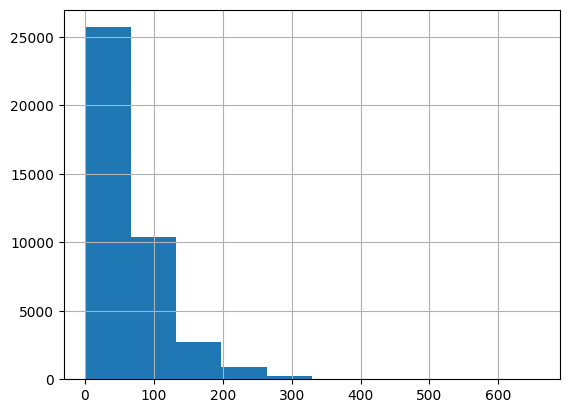

,0
count,40000.000000
mean,69.246175
std,48.303060
min,2.000000
25%,39.000000
50%,54.000000
75%,84.000000
max,656.000000


In [8]:
# 학습 데이터셋에서 각 데이터의 단어 수(문장 내 단어 수)에 대해 통계를 내보면 아래와 같이 나옴.
# 대부분의 데이터들을 모두 포함 가능한 200단어까지를 길이 상한으로 설정 예정
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()
# x축: 전처리 후 문장 길이
# y축: 문장 개수

In [9]:
# 200 단어에 맞추어 모든 데이터를 다시 정리
# 200 단어보다 더 짧은 데이터는 앞쪽 index들을 0으로 채우고나서 각 단어의 index를 채워서 길이 200을 맞춤.
# 200 단어보다 더 긴 데이터는 뒤쪽 부분을 버리게 됨.
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

x_train_pad = np.array(padding_(x_train,200))
x_test_pad = np.array(padding_(x_test,200))

In [10]:
# 길이까지 정리된 데이터를 이용해 데이터셋 및 데이터로더 생성
# 데이터를 index의 리스트 형태로 numpy array에 저장했으므로 TensorDataset 생성 가능

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [11]:
# 데이터로더로부터 샘플링하여 데이터 직접 확인
# Batch size가 50이므로 50개의 데이터에 대해 출력됨.

# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[ 37,  15,   4,  ...,  75,   9, 833],
        [  0,   0,   0,  ..., 330,   9, 186],
        [  0,   0,   0,  ...,  15,  55, 690],
        ...,
        [  0,   0,   0,  ..., 553,  75,  15],
        [  0,   0,   0,  ...,  97,  26, 229],
        [  0,   0,   0,  ..., 325,  65,   2]])
Sample input: 
 tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1])


# CNN 모델 구현
- 커널 크기는 2, 3, 4, 5 네 가지를 사용하며, 각 커널은 100개의 특징 맵을 생성토록 함.
- 워드 임베딩은 자연어 처리 연구에 여전히 널리 활용되고 있으나, 딥러닝 기반의 자연어 처리 연구에서는 워드 임베딩을 따로 학습해서 사용하기보다는 딥러닝 모델에 엮인 학습 가능한 임베딩 lookup table을 주로 이용함.
- nn.Embedding은 이와 같은 임베딩 lookup table을 구현한 클래스이며, word -> Integer -> lookup table -> Embedding vector 같은 구조로 학습.
- 이미지와 달리 임베딩 lookup table은 입력값까지 역전파가 진행되는 것이 특징임.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class NLP_CNN(nn.Module):
  def __init__(self, vocab_size, output_size, embedding_dim, num_filters=100, kernel_sizes=[2,3,4,5], dropout_prob=0.5):
    super(NLP_CNN, self).__init__()

    self.num_filters = num_filters
    self.embedding_dim = embedding_dim

    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.convs = nn.ModuleList([
        nn.Conv2d(1, num_filters, (k, embedding_dim)) for k in kernel_sizes
    ])

    self.fc = nn.Linear(len(kernel_sizes) * num_filters, output_size)
    self.dropout = nn.Dropout(dropout_prob)

  def forward(self, x):
    embeds = self.embedding(x) # (batch_size, seq_length, embedding_dim)

    embeds = embeds.unsqueeze(1) # (batch_size, 1, seq_length, embedding_dim)
    conv_results = [F.relu(conv(embeds)).squeeze(3) for conv in self.convs] # (batch_size, num_filters, seq_length - conv_size + 1, 1) -> (batch_size, num_filters, seq_length - conv_size + 1)
    pool_results = [F.max_pool1d(fm, fm.size(2)).squeeze(2) for fm in conv_results] # (batch_size, num_filters, 1) -> (batch_size, num_filters)

    x = torch.cat(pool_results, 1)
    x = self.dropout(x)

    logit = self.fc(x)

    return logit

In [15]:
embed_dim = 100
model = NLP_CNN(len(vocab)+1, 2, embed_dim).to(device)

In [16]:
def train(model, criterion, optimizer, data_loader):
  model.train()
  train_loss = 0
  for i, (x, y) in enumerate(data_loader):
    x, y = x.to(device), y.to(device)

    optimizer.zero_grad()
    logit = model(x)
    loss = criterion(logit, y)
    loss.backward()
    optimizer.step()
    train_loss += loss.item() * x.size(0)
  return train_loss / len(data_loader.dataset)

In [19]:
def evaluate(model, data_loader):
  model.eval()
  corrects, total_loss = 0, 0
  for i, (x, y) in enumerate(data_loader):
    x, y = x.to(device), y.to(device)
    logit = model(x)
    corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
  size = len(data_loader.dataset)

  avg_accuracy = 100.0 * corrects / size
  return avg_accuracy

In [20]:
num_epochs = 10
lr = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for e in range(1, num_epochs + 1):
  train_loss = train(model, criterion, optimizer, train_loader)
  test_accuracy = evaluate(model, test_loader)

  print(f"[Epoch: {e:d}] train loss: {train_loss:5.2f} | test accuarcy: {test_accuracy:5.2f}")

[Epoch: 1] train loss:  0.40 | test accuarcy: 84.07
[Epoch: 2] train loss:  0.36 | test accuarcy: 83.93
[Epoch: 3] train loss:  0.35 | test accuarcy: 85.19
[Epoch: 4] train loss:  0.32 | test accuarcy: 85.29
[Epoch: 5] train loss:  0.30 | test accuarcy: 85.22
[Epoch: 6] train loss:  0.28 | test accuarcy: 85.14
[Epoch: 7] train loss:  0.25 | test accuarcy: 84.73
[Epoch: 8] train loss:  0.22 | test accuarcy: 84.63
[Epoch: 9] train loss:  0.19 | test accuarcy: 85.15
[Epoch: 10] train loss:  0.17 | test accuarcy: 85.26
